# <font color = gree>PRDL & MLLB courses ETSIT - UPM</font>
> <font color=orange size= 4>One approach to Compare ML models for extreme OSA cases classification</font>
---


* ### We will use the data in: OSA_extreme_male.xlsx</font>




---
---
Load : OSA_extreme_male.xlsx  from your Laptop



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19282 bytes


In [ ]:
ls

OSA_extreme_male.xlsx  sample_data/


---

### Read the *OSA_extreme_male.xlsx* file

In [ ]:
# Import pandas
import pandas as pd

# Read OSA_DB_UPM.xlsx
df_OSA_male_extreme = pd.read_excel("OSA_extreme_male.xlsx")


In [ ]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
5,P0020,hombre,4.3,89,171,44,45,Healthy,30.436716
6,P0022,hombre,56.0,113,177,33,46,Severe,36.068818
7,P0024,hombre,53.6,107,170,48,46,Severe,37.024221
8,P0025,hombre,2.1,70,174,53,38,Healthy,23.120624
9,P0027,hombre,47.0,100,180,62,48,Severe,30.864198


* # Indicate the features we will use

In [ ]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = df_OSA_male_extreme.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA"]]

# Store the variable we'll be predicting on.
target = "OSA"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Height', 'Age', 'Cervical', 'BMI']


## We will use data (our features) as Numpy arrays

In [ ]:
import numpy as np

X = np.array(df_OSA_male_extreme[columns])


In [ ]:
X.shape

(278, 5)

# Consider those ML models requiring <font color=red>feature normalization</font>

# The outcome "y" will have two values: binary classification

* # we can map "Healthy" to "0" and "Severe" to "1"

In [ ]:
df_OSA_male_extreme.OSA = df_OSA_male_extreme.OSA.map({'Healthy': 0, 'Severe': 1})

In [ ]:
df_OSA_male_extreme.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,0,26.729927
1,P0006,hombre,2.0,109,190,32,42,0,30.193906
2,P0007,hombre,34.0,86,169,39,42,1,30.110991
3,P0008,hombre,60.0,145,172,47,44,1,49.012980
4,P0013,hombre,3.7,90,180,36,40,0,27.777778


In [ ]:
y = np.array(df_OSA_male_extreme['OSA'])

# For this example we will follow <font color=magenta>Nested or Double Loop Crossvalidation</font> as you can read in this blog:

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# configure the OUTER LOOP cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()

# OUTER LOOP ======================================
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]

  # INNER LOOP ====================================
	# configure the INNER cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 600]
	space['max_features'] = [2, 3, 4]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)

 	# get the best performing model fit on the INNER LOOP
	best_model = result.best_estimator_

	# evaluate model on the hold out (OUTER LOOP) dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

KeyboardInterrupt: ignored

In [ ]:
space

{'n_estimators': [100, 250, 500, 600], 'max_features': [2, 3, 4]}

# TRY XGBoost

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/



In [ ]:
! pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = XGBClassifier(random_state=1)
	# define search space
  space = dict()
  space['n_estimators'] = [100, 250, 500, 600]
  space['learning_rate'] = [0.01, 0.05, 0.1, 0.3]
  space['max_depth'] = [2, 3, 5, 6]

	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.607, est=0.740, cfg={'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 250}
>acc=0.821, est=0.672, cfg={'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
>acc=0.750, est=0.720, cfg={'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
>acc=0.821, est=0.760, cfg={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
>acc=0.714, est=0.724, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
>acc=0.857, est=0.704, cfg={'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
>acc=0.679, est=0.724, cfg={'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
>acc=0.714, est=0.752, cfg={'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600}
>acc=0.815, est=0.653, cfg={'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
>acc=0.593, est=0.721, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.737 (0.088)


# You can read: In Depth: Parameter tuning for SVC
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

In [ ]:
from sklearn.svm import SVC


# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = SVC(random_state=1)
	# define search space
  space = dict()
  space['C'] = [0.1, 1, 10, 100, 1000]
  space['kernel'] = ['rbf', 'linear']
  space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.500, est=0.732, cfg={'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
>acc=0.679, est=0.712, cfg={'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
>acc=0.750, est=0.712, cfg={'C': 1, 'gamma': 1, 'kernel': 'linear'}
>acc=0.786, est=0.724, cfg={'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
>acc=0.643, est=0.684, cfg={'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
>acc=0.786, est=0.708, cfg={'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
>acc=0.643, est=0.712, cfg={'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
>acc=0.750, est=0.728, cfg={'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
>acc=0.778, est=0.709, cfg={'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
>acc=0.667, est=0.717, cfg={'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.698 (0.086)


* # <font color = magenta>**Logistic Regression**</font> in  [Scikit Learn Package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

* # You can see:
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/



In [ ]:
from sklearn.linear_model import LogisticRegression


# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = LogisticRegression(random_state=1)
	# define search space
  space = dict()
  space['penalty'] = ['l2']
  space['C'] = [100, 10, 1.0, 0.1, 0.01]
	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.500, est=0.728, cfg={'C': 0.1, 'penalty': 'l2'}
>acc=0.679, est=0.680, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.750, est=0.696, cfg={'C': 100, 'penalty': 'l2'}
>acc=0.714, est=0.708, cfg={'C': 100, 'penalty': 'l2'}
>acc=0.714, est=0.700, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.821, est=0.696, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.679, est=0.688, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.679, est=0.732, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.778, est=0.686, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.667, est=0.697, cfg={'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.698 (0.081)


# Training and tuning a Decission Tree
https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489

> * # and visualizing the Tree

https://mljar.com/blog/visualize-decision-tree/


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = DecisionTreeClassifier(random_state=1)
	# define search space
  space = dict()
  space['max_leaf_nodes'] = list(range(2, 100))
  space['min_samples_split'] = [2, 3, 4]
	# define search
  search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  acc = accuracy_score(y_test, yhat)
	# store the result
  outer_results.append(acc)
	# report progress
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.571, est=0.748, cfg={'max_leaf_nodes': 9, 'min_samples_split': 2}
>acc=0.786, est=0.676, cfg={'max_leaf_nodes': 6, 'min_samples_split': 2}
>acc=0.786, est=0.728, cfg={'max_leaf_nodes': 28, 'min_samples_split': 2}
>acc=0.607, est=0.752, cfg={'max_leaf_nodes': 20, 'min_samples_split': 2}
>acc=0.679, est=0.720, cfg={'max_leaf_nodes': 7, 'min_samples_split': 2}
>acc=0.857, est=0.676, cfg={'max_leaf_nodes': 21, 'min_samples_split': 2}
>acc=0.643, est=0.732, cfg={'max_leaf_nodes': 14, 'min_samples_split': 2}
>acc=0.750, est=0.732, cfg={'max_leaf_nodes': 13, 'min_samples_split': 2}
>acc=0.741, est=0.677, cfg={'max_leaf_nodes': 7, 'min_samples_split': 2}
>acc=0.704, est=0.685, cfg={'max_leaf_nodes': 13, 'min_samples_split': 2}
Accuracy: 0.712 (0.084)


# Train a tree with "best hyperparameters" using all data

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes = 13, min_samples_split = 2, random_state=1)

model = clf.fit(X, y)


* # and <font color = magenta>visualize</font> the tree

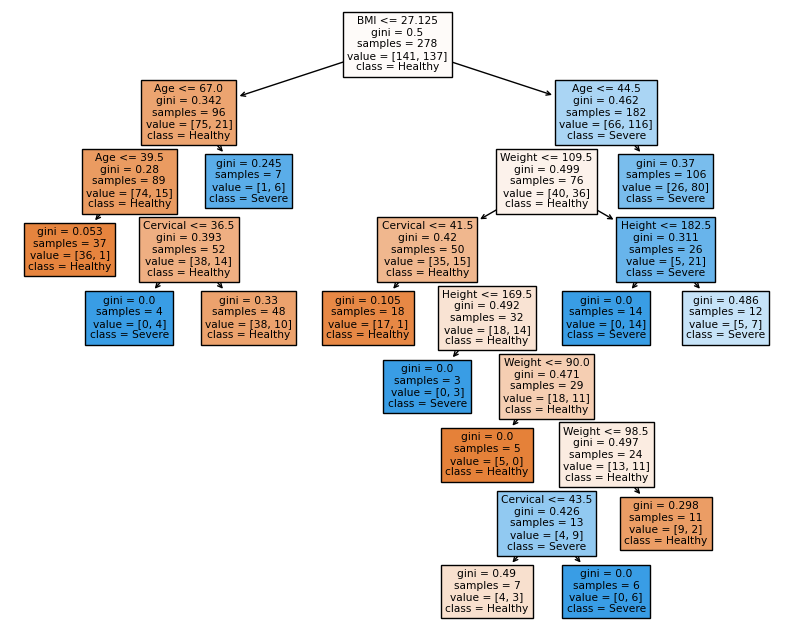

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(model,
                   feature_names = columns,
                   class_names = ['Healthy', 'Severe'],
                   filled=True)


In [ ]:
! pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.8 MB/s eta 0:00:00


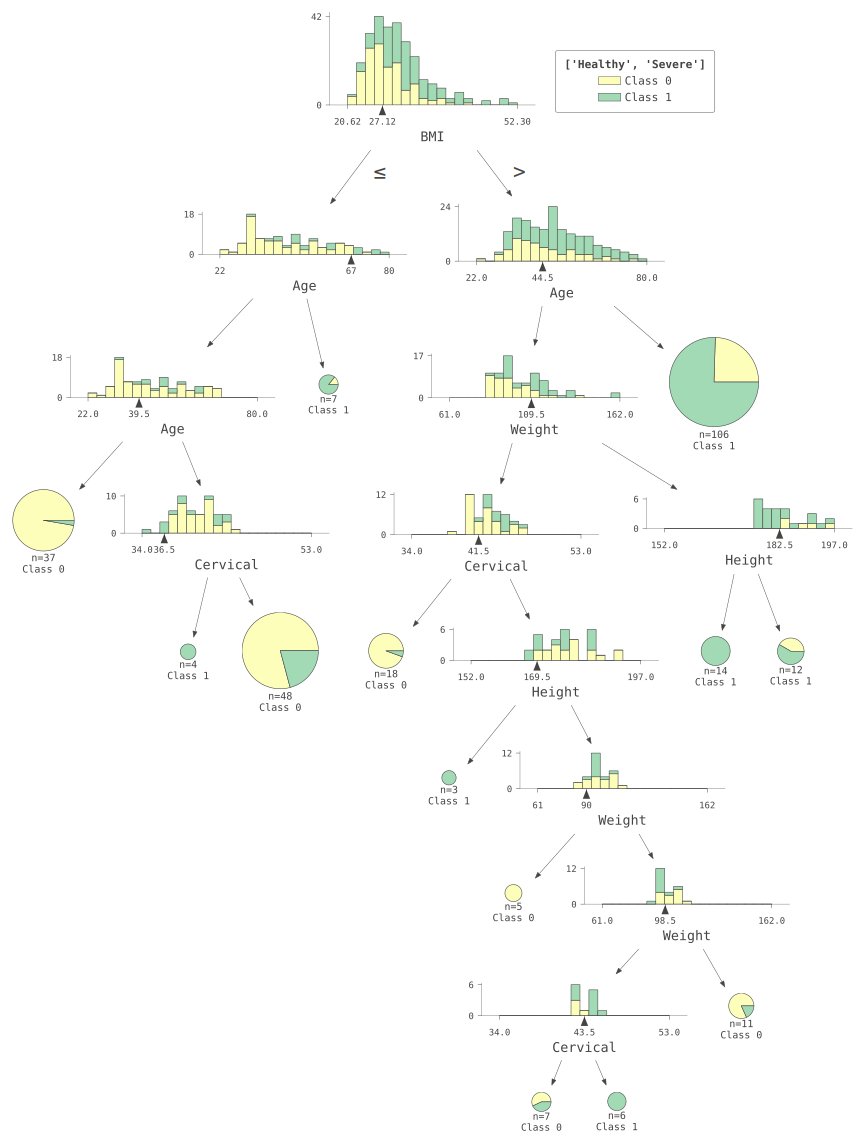

In [ ]:
import dtreeviz


viz = dtreeviz.model(model,
               X,
               y,
               target_name= ['Healthy', 'Severe'],  # this name will be displayed at the leaf node
               feature_names = columns,
              )

viz.view(scale=1.5,fontname="monospace")


# You can read more about using Dtreeviz at:
https://www.tensorflow.org/decision_forests/tutorials/dtreeviz_colab

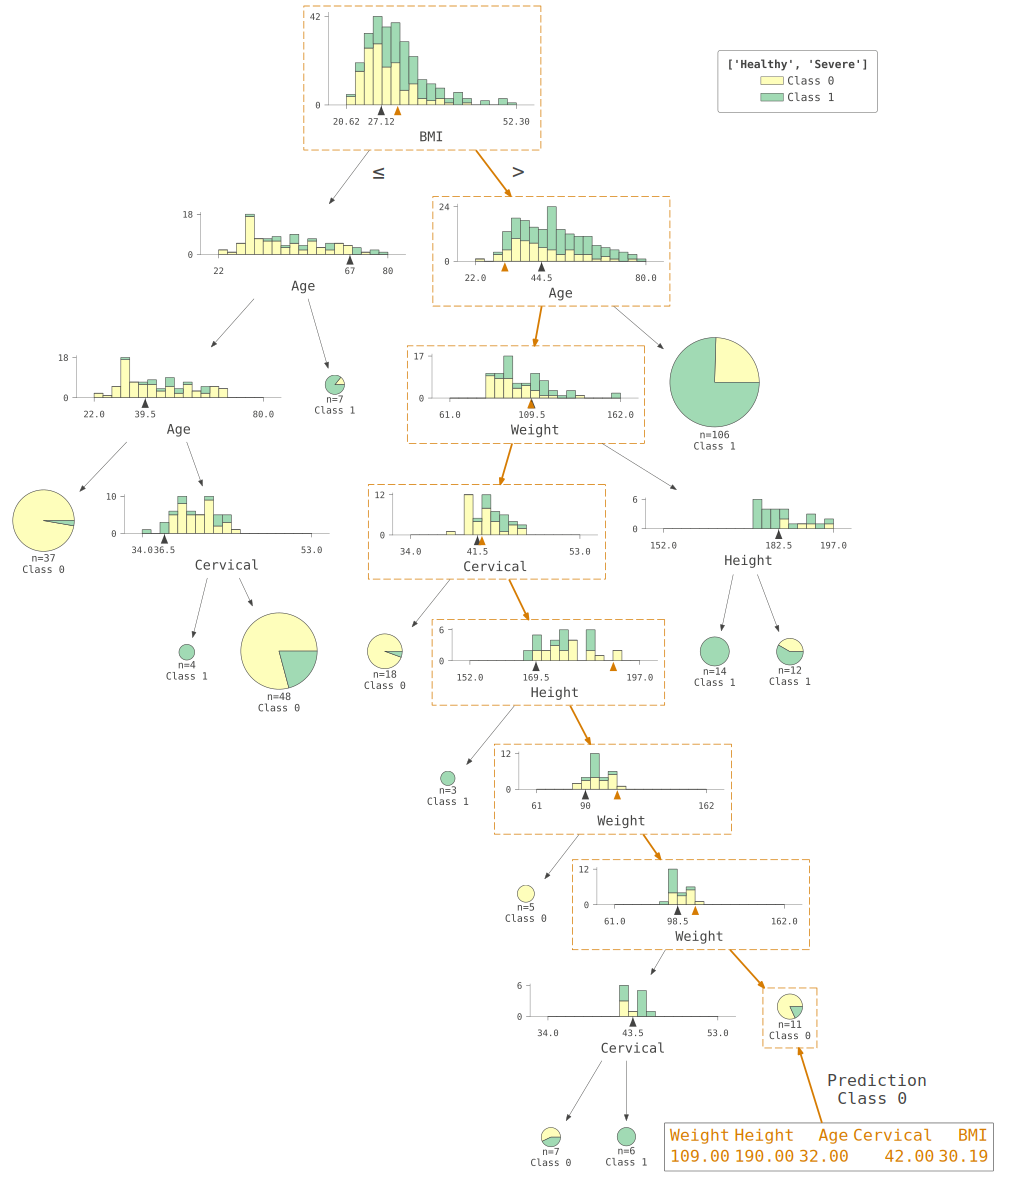

In [ ]:
# FOR EXAMPLE: how to visualize a given data X[index]

index = 1
viz.view(x=X[index], scale=1.5,fontname="monospace")


# You can try using <font color=magenta>Bayesian Optimization </font>

https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/